In [25]:
""" proposition of numerical study
    prosit 2, mecanics, CPI A1
--------------------------------
author: Antoine Boulet
        (aboulet@ismans.cesi.fr)
date: 2022-01-06
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import tikzplotlib

In [26]:
def H(n, mx, mb = 5.0, f = 60.0, g = 9.81):
    """ Function that return H_n (defined in the note)
        as a function of the player's mass mx (m_p in the notes)
    """
    
    # definition of the fixed variables in SI units 
    # (some of them are also assigned to default values as predefined variables of the function)
    H0 = 4.0; L0 = 3.0; Ra = 0.2; Rb = 1.8; mc = 15.0
    
    # define the intermediate length of the trajectory path
    Ln = L0 +  (np.pi / 2.0 - 1.0) * (2.0 * Rb + np.kron(0, n) * Ra)
    
    # define the masses of the system with or without the ball
    mm = mx + mc      # m_-
    mp = mx + mc + mb # m_+
    
    # define others notations (in order to be able to take the limit f = 0)
    A = (g * mp - f) / (g * mm + f)
    B = f * Ln / (g * mm + f) # \epsilon_n in the note
    
    # return (recursive) formula found in the notes
    if n < 0: return 0
    elif n == 0: return H0
    else: return A * H(n - 1, mx, mb, f, g) - B

Masse maximale du joueur = 61 kg


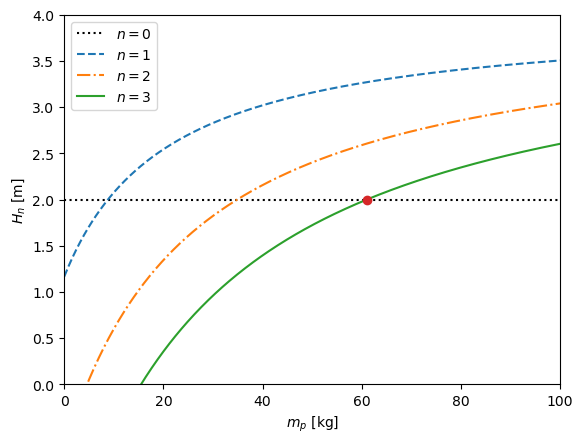

In [29]:
""" Solver: found solution, i.e. maximal mass, such that H_3 < h
"""
h = 2.0
f = lambda m : H(3, m) - h 
m_max = fsolve(f, 100)[0]
print('Masse maximale du joueur =', round(m_max), 'kg')


""" Plot figure H_n = f(m)
"""

M = np.linspace(0, 100, 500)

plt.figure()

plt.plot(M, h * np.ones(M.size), ':', label = r'$n = 0$', color = 'k')
plt.plot(M, H(1, M), '--', label = r'$n = 1$')
plt.plot(M, H(2, M), '-.', label = r'$n = 2$')
plt.plot(M, H(3, M), '-', label = r'$n = 3$')
plt.plot(m_max, H(3, m_max), 'o')

plt.xlabel(r'$m_p ~ [\mathrm{kg}]$')
plt.ylabel(r'$H_n ~ [\mathrm{m}]$')

plt.xlim(0, 100)
plt.ylim(0, 4)

plt.legend()

tikzplotlib.save('file1.tex')

plt.show()

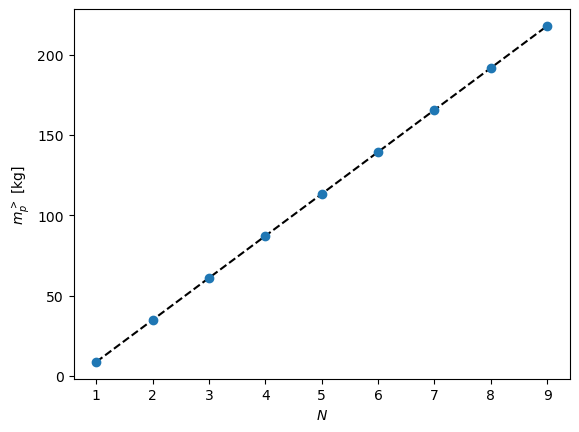

In [28]:
""" Solver: found solution, i.e. maximal mass, such that H_N < h
"""
h = 2.0
M_MAX = []
N_ = range(1, 10)
for n in N_:
    f = lambda m : H(n, m) - h
    M_MAX += [fsolve(f, 100)[0]]


""" Plot figure M_MAX = f(N)
"""
plt.figure()

coef = np.polyfit(N_, M_MAX, 1); poly1d_M_MAX = np.poly1d(coef) # linear fit, cf. https://stackoverflow.com/a/6148315

plt.plot(N_, poly1d_M_MAX(N_), '--k')
plt.plot(N_, M_MAX, 'o')

plt.ylabel(r'$m_p^> ~ [\mathrm{kg}]$')
plt.xlabel(r'$N$')

tikzplotlib.save('file2.tex')

plt.show()